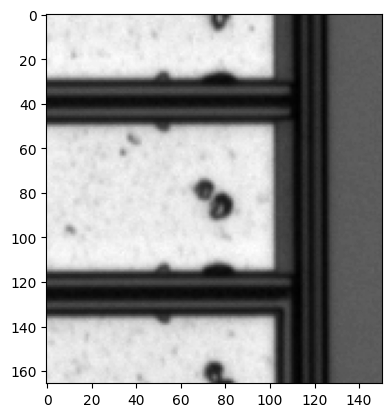

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img=cv2.imread(r"C:\Users\AN515\Desktop\NHW\input\binary_task1.bmp",0) 

plt.imshow(img,cmap='gray')
plt.show()

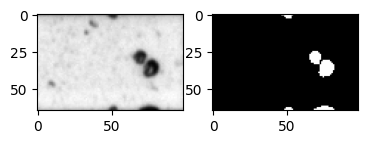

In [33]:
#切區域
y1, y2 = 50, 115
x1, x2 = 1, 100   
roi = img[y1:y2, x1:x2]
plt.subplot(1,3,1)
plt.imshow(roi,cmap='gray')

#二值化
_, binary = cv2.threshold(roi, 115, 255, cv2.THRESH_BINARY_INV)
plt.subplot(1,3,2)
plt.imshow(binary,cmap='gray')

#去躁
# kernel = np.ones((5,5), np.uint8)
# eroded_img = cv2.erode(binary, kernel, iterations=1)
# kernel = np.ones((5,5), np.uint8)
# dilated_img = cv2.dilate(eroded_img, kernel, iterations=1)
# plt.subplot(1,3,3)
# plt.imshow(dilated_img,cmap='gray')
# plt.show()


Total Area of Pad 140.5


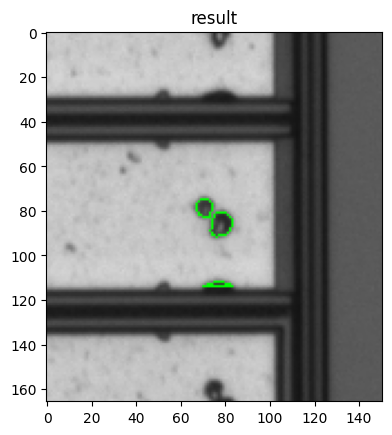

In [34]:
#找輪廓
contours, _ = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#篩pad設面積大小
pads = [cnt for cnt in contours if 15 < cv2.contourArea(cnt) < 500]

#在result上畫結果
result = cv2.cvtColor(roi, cv2.COLOR_GRAY2BGR)
At=0
for cnt in pads:
    A=cv2.contourArea(cnt)
    At+=A
    cv2.drawContours(result, [cnt], -1, (0,255,0), 1) #在result上畫結果
print("Total Area of Pad", At)

#剛剛算的蓋到原圖
final = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
final[y1:y2, x1:x2] = result

plt.imshow(cv2.cvtColor(final, cv2.COLOR_BGR2RGB))
plt.title("result")
plt.show()
